--- Data has been successfully cleaned ---
Final dataset shape: (11362, 11)

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    11362 non-null  object        
 1   customer_id       11362 non-null  object        
 2   category          11362 non-null  object        
 3   item              11362 non-null  object        
 4   price_per_unit    11362 non-null  float64       
 5   quantity          11362 non-null  float64       
 6   total_spent       11362 non-null  float64       
 7   payment_method    11362 non-null  object        
 8   location          11362 non-null  object        
 9   transaction_date  11362 non-null  datetime64[ns]
 10  discount_applied  7579 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.0+ MB


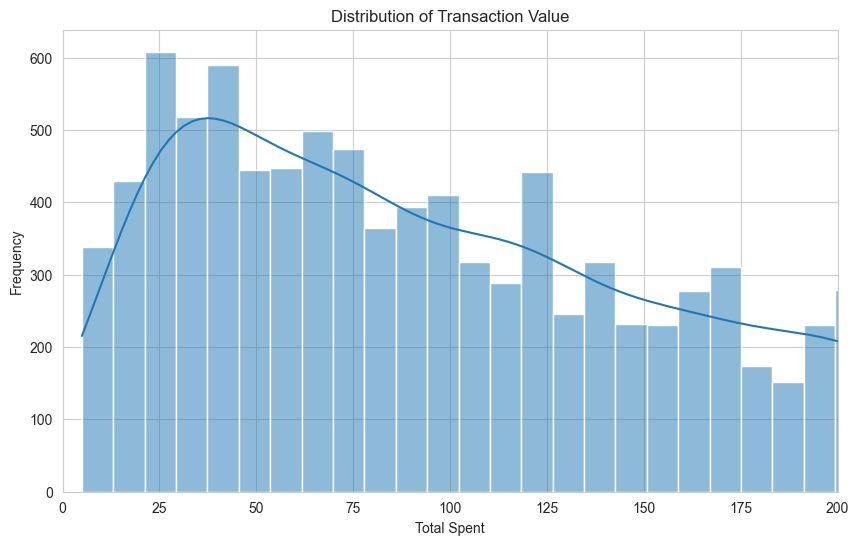

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_40269/3084890057.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


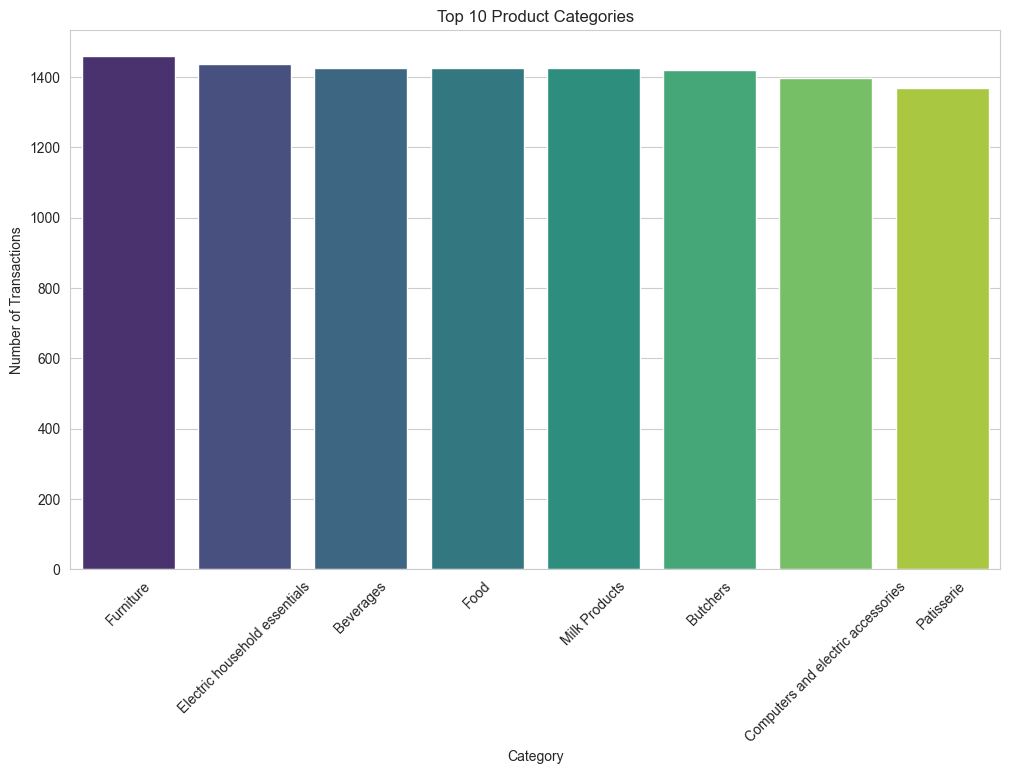

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_40269/3084890057.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('transaction_date')['total_spent'].resample('M').sum()


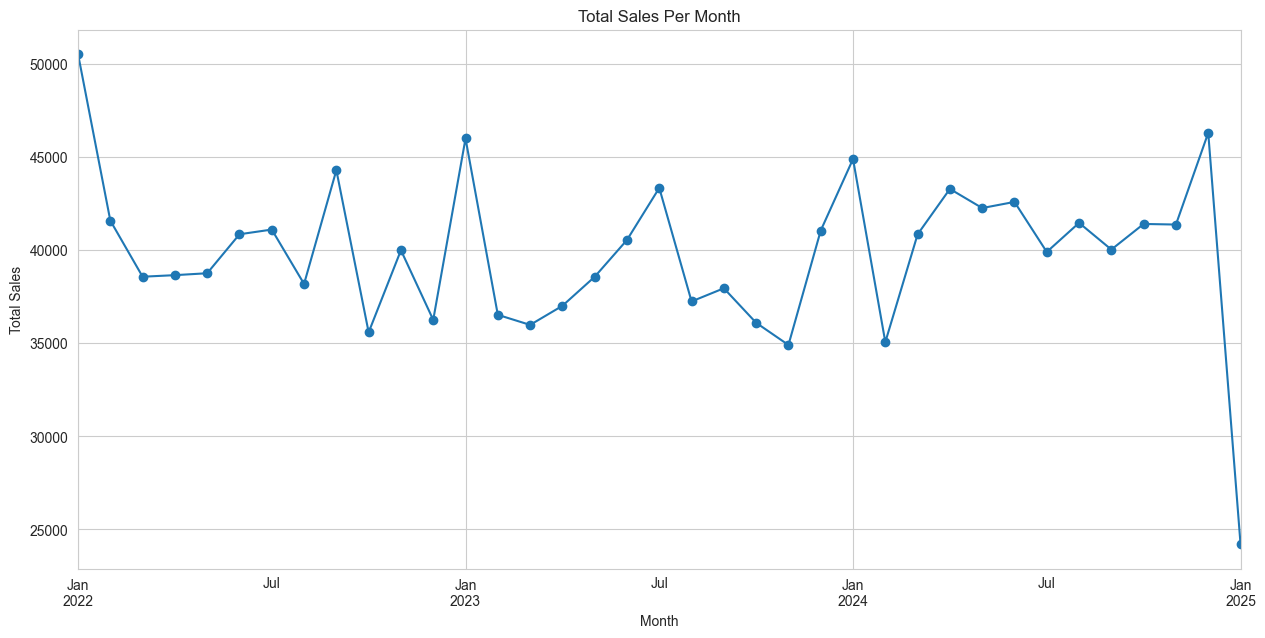

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_40269/3084890057.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='plasma', order=top_customers.index)


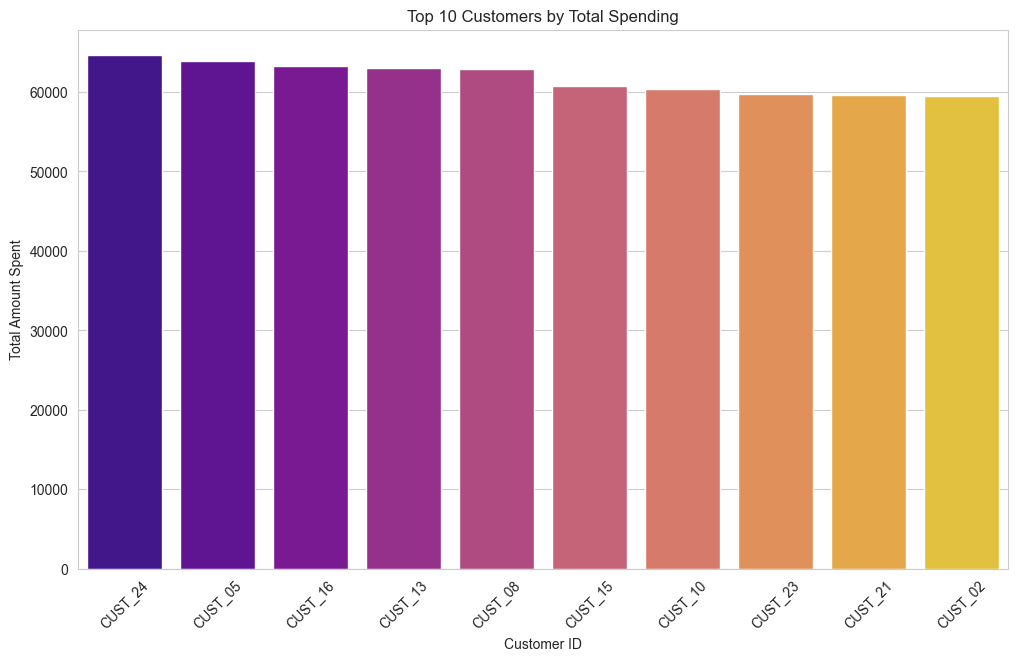

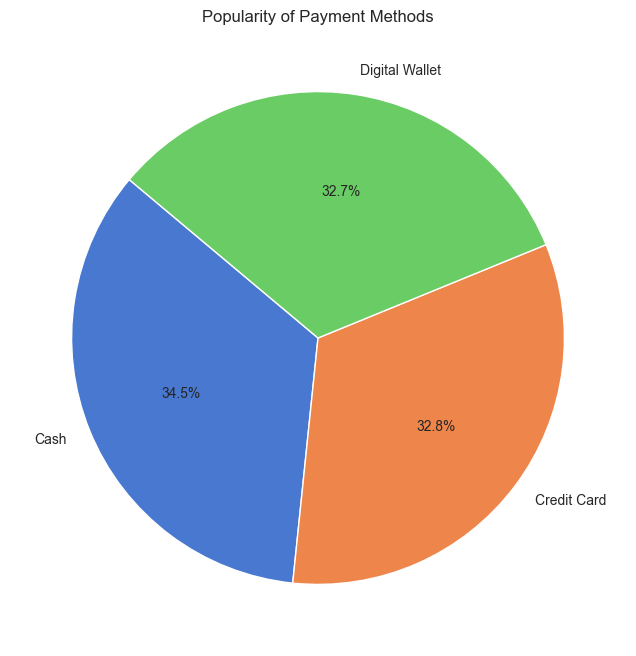

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_40269/3084890057.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spent_by_location.index, y=avg_spent_by_location.values, palette='cubehelix')


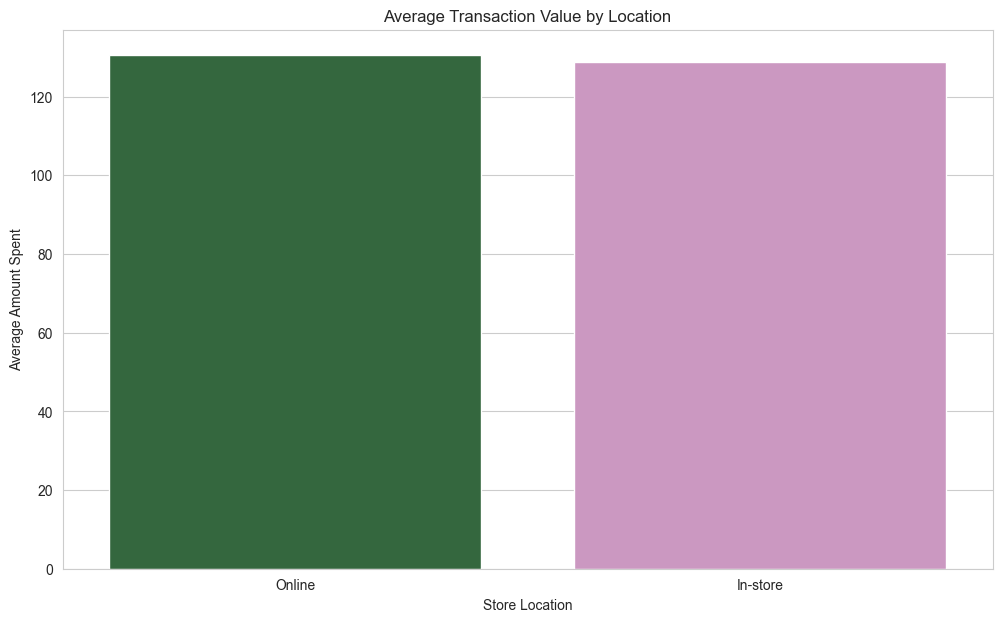

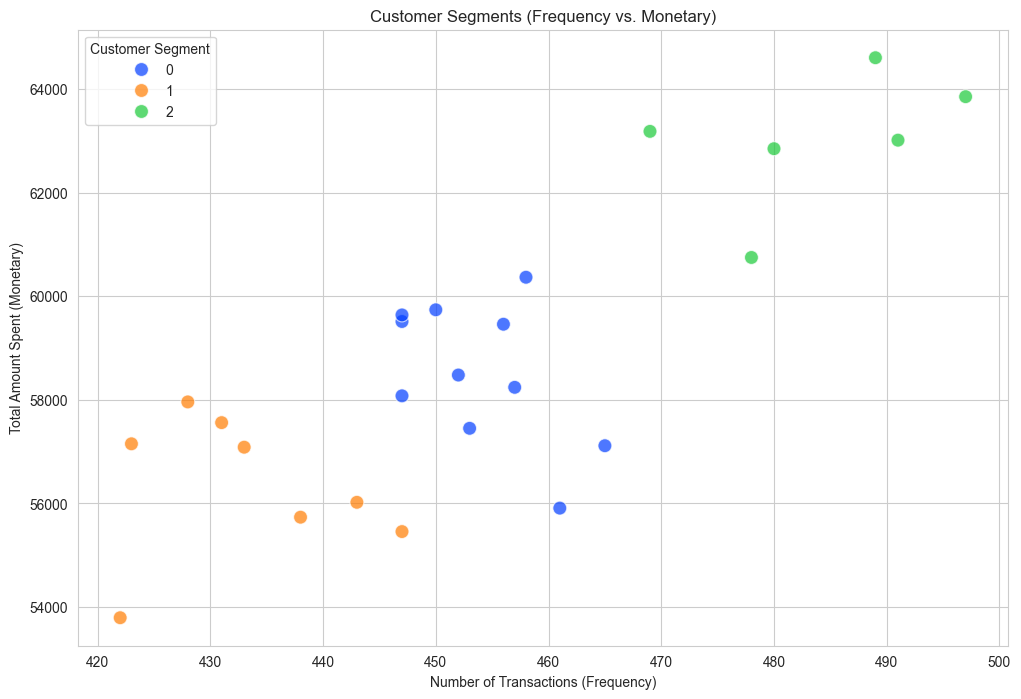


--- Customer Segment Analysis ---
Average values per customer segment:
             monetary   frequency
cluster                          
0        58544.000000  453.909091
1        56343.750000  433.125000
2        63044.083333  484.000000


In [6]:
# --- Step 1 & 2: Load Data & Standardize Column Names ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('dirty_retail_sales.csv')

# Standardize column names (strip whitespace, lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


# --- Step 3: Clean the Data & Correct Data Types ---

# Handle missing values and correct data types
df.dropna(subset=['customer_id'], inplace=True)
df['customer_id'] = df['customer_id'].astype(str) # Correctly handle alphanumeric IDs

df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df.dropna(subset=['transaction_date'], inplace=True)

# Remove invalid data (e.g., returns or free items)
df = df[df['quantity'] > 0]
# Change this line:
# df = df[df['unit_price'] > 0]

# To this:
df = df[df['price_per_unit'] > 0]

# Drop duplicate rows
df.drop_duplicates(inplace=True)

print("--- Data has been successfully cleaned ---")
print(f"Final dataset shape: {df.shape}")
print("\n--- Cleaned Data Info ---")
df.info()


# --- Step 4: Exploratory Data Analysis (EDA) ---

# Set the visual style for all plots
sns.set_style('whitegrid')

# 1. Distribution of Total Spent per Transaction
plt.figure(figsize=(10, 6))
sns.histplot(df['total_spent'], bins=50, kde=True)
plt.title('Distribution of Transaction Value')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Limit x-axis to better see the main distribution
plt.show()

# 2. Top 10 Most Popular Product Categories
plt.figure(figsize=(12, 7))
top_categories = df['category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 3. Sales Trends Over Time
monthly_sales = df.set_index('transaction_date')['total_spent'].resample('M').sum()
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# --- Step 5: Ask & Answer 3 Key Questions ---

# Question 1: Who are the top 10 customers by total spending?
top_customers = df.groupby('customer_id')['total_spent'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='plasma', order=top_customers.index)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

# Question 2: Which payment method is the most popular?
payment_methods = df['payment_method'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Popularity of Payment Methods')
plt.ylabel('')
plt.show()

# Question 3: What is the average transaction value by store location?
avg_spent_by_location = df.groupby('location')['total_spent'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_spent_by_location.index, y=avg_spent_by_location.values, palette='cubehelix')
plt.title('Average Transaction Value by Location')
plt.xlabel('Store Location')
plt.ylabel('Average Amount Spent')
plt.show()


# --- Step 6: Bonus: Build a Simple Model (Customer Segmentation) ---

# 1. Engineer features for each customer (Frequency and Monetary value)
customer_df = df.groupby('customer_id').agg(
    monetary=('total_spent', 'sum'),
    frequency=('transaction_id', 'count')
)

# 2. Scale the features for clustering
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)

# 3. Build and fit the K-Means model to create 3 segments
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
customer_df['cluster'] = kmeans.fit_predict(customer_df_scaled)

# 4. Visualize the customer segments
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=customer_df,
    x='frequency',
    y='monetary',
    hue='cluster',
    palette='bright',
    s=100,
    alpha=0.7
)
plt.title('Customer Segments (Frequency vs. Monetary)')
plt.xlabel('Number of Transactions (Frequency)')
plt.ylabel('Total Amount Spent (Monetary)')
plt.legend(title='Customer Segment')
plt.show()

print("\n--- Customer Segment Analysis ---")
print("Average values per customer segment:")
print(customer_df.groupby('cluster').mean())

In [3]:
print(df.columns)

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')


In [4]:
# Change this line:
# df = df[df['unit_price'] > 0]

# To this:
df = df[df['price_per_unit'] > 0]